<a href="https://colab.research.google.com/github/anakhashibu1999/1/blob/main/cancer_data__csv(knn%2Cnavie%2Csvm)1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/cancer_data.csv')
df


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [ ]:
X=df.iloc[:,:-1].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02]])

In [ ]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)


In [ ]:
X_train.shape

(398, 5)

In [ ]:
X_test.shape

(171, 5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_train_new

array([[0.29624369, 0.27730808, 0.28381849, 0.1778941 , 0.16780652],
       [0.27812332, 0.22590463, 0.26940639, 0.16437827, 0.08563782],
       [0.34276899, 0.14440311, 0.355879  , 0.20840127, 0.40231936],
       ...,
       [0.32317939, 0.2404464 , 0.29937215, 0.19831803, 0.01764298],
       [0.30799745, 0.33513696, 0.3052226 , 0.18411568, 0.43106353],
       [0.21984426, 0.36557322, 0.20605023, 0.12370205, 0.17464565]])

In [ ]:
X_test_new=sc.transform(X_test)
X_test_new

array([[ 0.23404672,  0.30064254,  0.23366153,  0.13365657,  0.3681237 ],
       [ 0.55090847,  0.39228948,  0.53695776,  0.41173947,  0.27336703],
       [ 0.38047897,  0.33040243,  0.38070776,  0.24821934,  0.46278125],
       [ 0.23061854,  0.26952993,  0.23637272,  0.12760662,  0.42511646],
       [ 0.18850091,  0.15995942,  0.18771404,  0.09975972,  0.37000694],
       [ 0.6322053 ,  0.66351031,  0.65468037,  0.46966446,  0.5480226 ],
       [ 0.70125863,  0.41224214,  0.70533676,  0.56277353,  0.43403707],
       [ 0.48381409,  0.18058843,  0.47559932,  0.33669441,  0.35642779],
       [ 0.2766541 ,  0.20798106,  0.27218893,  0.15000429,  0.44890475],
       [ 0.30407953,  0.23368279,  0.28988299,  0.18407277,  0.057191  ],
       [ 0.27028748,  0.52553263,  0.25513699,  0.15768472,  0.25175934],
       [ 0.44512464,  0.30740615,  0.43493151,  0.30717412,  0.25909406],
       [ 0.35648171,  0.33987149,  0.3364726 ,  0.2230327 ,  0.21508574],
       [ 0.41965816,  0.41156578,  0.4

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new,y_train)
y_pred=knn.predict(X_test_new)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



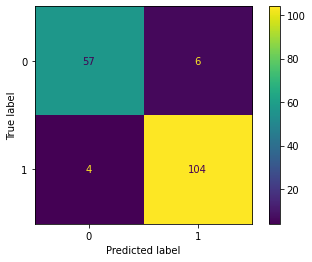

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_new,y_train)
y_pred_nb=nb.predict(X_test_new)
y_pred_nb

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        63
           1       0.92      1.00      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



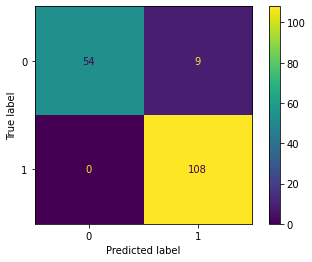

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))

In [ ]:
#sv
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train_new,y_train)
y_pred_sv=sv.predict(X_test_new)
y_pred_sv

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
sv.predict(sc.transform([[18.5,19.8,130.1,516,.05]]))

array([0])

In [ ]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(X_train_new,y_train)
y_pred_dec=dec.predict(X_test_new)
y_pred_dec

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred_dec))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        63
           1       0.94      0.91      0.92       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.91      0.91      0.91       171

